In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import pickle
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import *
# import umap

import os
from sknetwork.clustering import Louvain,get_modularity
import sys 
sys.path.append(os.getcwd()+'/../scripts/') 
from utils import *
from UMAP_utils import *
sys.path.append('C:/Users/Nishant Joshi/Model_fitting/GIFFittingToolbox/src/examples/')
from cluster_stability import *
from sklearn.metrics.pairwise import cosine_similarity


c:\Users\Nishant Joshi\anaconda3\envs\brian2\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
exc_step = loadmat("D:/Step-and-Hold Protocol (Xuan, Asli, NC, Payam)/xuan_20-9-19-E3-CCSTEP-NODRUG.mat")
inh_step = loadmat("D:/Step-and-Hold Protocol (Xuan, Asli, NC, Payam)/asli_6-8-19-E1-CCSTEP-NODRUG.mat")

In [3]:
# data_inh = loadmatInPy("D:/Analyzed/asli_6-8-19_E1_analyzed.mat")
# V_inh = data_inh[0]['membrane_potential']
# spks_inh = data_inh[0]['spikeindices']

In [4]:
# data_exc =loadmatInPy("D:/Analyzed/xuan_20-9-19_E3_analyzed.mat") 
# V = data_exc[0]['membrane_potential']
# spks = data_exc[0]['spikeindices']

In [4]:
savepath = 'D:/Data For Publication/figures/part1/'


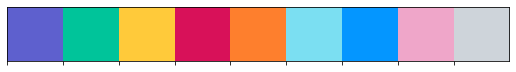

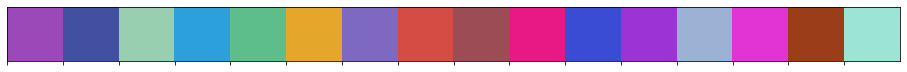

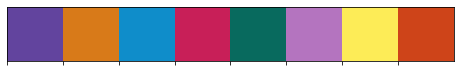

In [5]:
pal = ["#00202e","#003f5c","#2c4875","#8a508f","#bc5090","#ff6361","#ff8531","#ffa600","#ffd380"]
CUSTOM_PAL_SORT_3 = ['#5e60ce','#00c49a','#ffca3a','#D81159','#fe7f2d','#7bdff2','#0496ff','#efa6c9','#ced4da']
GMM_PAL = ['#d62424','#12db41','#f0c905','#248cd6']

SH = ['#62449E', '#D87A19','#0F8DCA','#C81F58','#086A5E','#B474BF','#FDEC57','#CE4419']
# In RGB form
coherence_colors = [[0.609, 0.283, 0.724],
                    [0.259,	0.314, 0.635],
                    [0.6,	0.812, 0.698],
                    [0.176,	0.631, 0.859],
                    [0.369,	0.749, 0.549],
                    [0.898,	0.654, 0.169],
                    [0.5,	0.41 , 0.75],
                    [0.834,	0.3 , 0.265],
                    [0.612,	0.3 , 0.334],
                    [0.912,	0.1 , 0.52],
                    [0.23,	0.3 , 0.834],
                    [0.612,	0.2 , 0.834],
                    [0.612,	0.7 , 0.834],
                    [0.89,	0.2 , 0.834],
                    [0.612,	0.24 , 0.1],
                    [0.612,	0.9 , 0.834]]
sns.palplot(CUSTOM_PAL_SORT_3)
sns.palplot(coherence_colors)
sns.palplot(SH)

# Combine data from NC dataset and common dataset

In [6]:
prob_exps = ['payam_31019_E5',
             'xuan_9519_E3',
             'xuan_9919_E3',
             'payam_101019_E4']

In [4]:
FN_combined = pd.read_pickle('D:/Data For Publication/paper1/combined_FN_acsf.pkl')
# FN_combined = FN_combined[~FN_combined.exp_name.isin(prob_exps)]
SH_combined = pd.read_pickle('D:/Data For Publication/paper1/combined_CC_acsf.pkl')
# SH_combined = SH_combined[~SH_combined.exp_name.isin(prob_exps)]

In [8]:
FN_combined.exp_name

0      170615_NC_19
1      170616_NC_20
2      170620_NC_22
3      170626_NC_29
4      170627_NC_30
           ...     
185    xuan_9519_E3
186    xuan_9919_E1
187    xuan_9919_E2
188    xuan_9919_E3
189    xuan_9919_E4
Name: exp_name, Length: 190, dtype: object

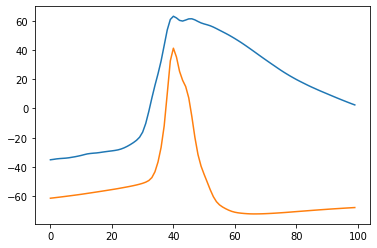

In [9]:
arg_min = np.argmin(FN_combined['mean_width'])
arg_max = np.argmax(FN_combined['mean_width'])
exp_min = FN_combined.loc[arg_min]['exp_name']
exp_max = FN_combined.loc[arg_max]['exp_name']

plt.plot(FN_combined.loc[arg_max]['waveform'])
plt.plot(FN_combined.loc[arg_min]['waveform'])

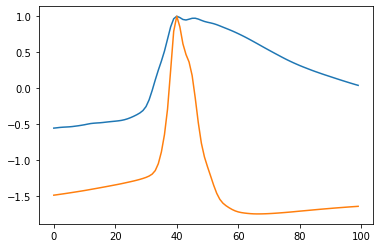

In [10]:
plt.plot((FN_combined.loc[arg_max]['waveform'])/np.max((FN_combined.loc[arg_max]['waveform'])))
plt.plot((FN_combined.loc[arg_min]['waveform'])/np.max((FN_combined.loc[arg_min]['waveform'])))


# Plotting FN snd SH together on the same UMAP

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


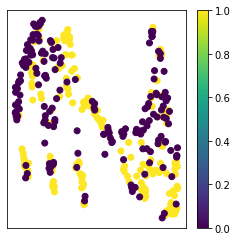

In [10]:
scaler = StandardScaler()
cols = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'max_isi', 'min_isi', 'median_isi',
       'first_thr', 'mean_thr', 'max_thr', 'min_thr', 'median_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude','max_amplitude', 'min_amplitude',]

fn_numpy = normalize(np.vstack(FN_combined['waveform'].to_numpy()))
sh_numpy = normalize(np.vstack(SH_combined['waveforms'].to_numpy()))

all = np.vstack([fn_numpy,sh_numpy]) 

plot_UMAP_values(all,np.hstack([np.ones(len(fn_numpy)),np.zeros(len(sh_numpy))]),random_state=42,savepath=savepath+'waveform_umap_SH_FN.pdf',save=True)


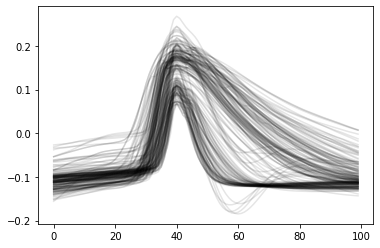

In [12]:
fn_numpy_ = fn_numpy
plt.plot(fn_numpy_.T,c='black',alpha=0.1)
plt.show()

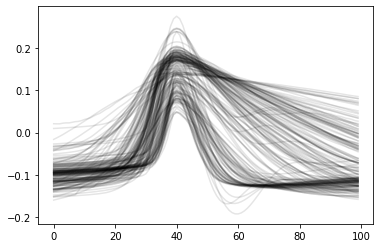

In [13]:
sh_numpy_ = sh_numpy
plt.plot(sh_numpy_.T,c='black',alpha=0.1)
plt.show()

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


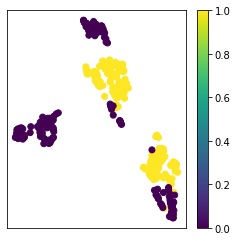

In [8]:
fn_numpy = normalize(np.vstack(FN_combined[cols].to_numpy()),axis=0)
sh_numpy = normalize(np.vstack(SH_combined[cols].to_numpy()),axis=0)

all = np.vstack([fn_numpy,sh_numpy]) 
all_vert = np.hstack([fn_numpy,sh_numpy]) 
plot_UMAP_values(all,np.hstack([np.ones(len(fn_numpy)),np.zeros(len(sh_numpy))]),random_state=42,savepath=savepath+'ephys_umap_SH_FN.pdf',save=True)

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


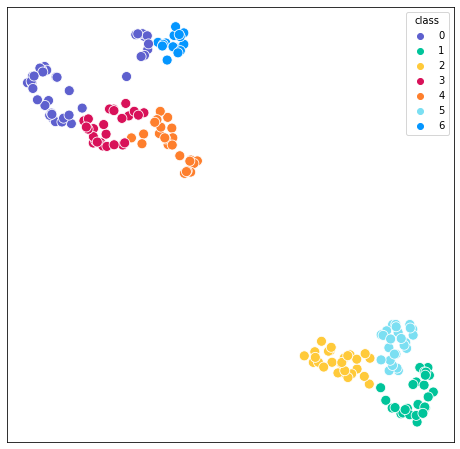

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


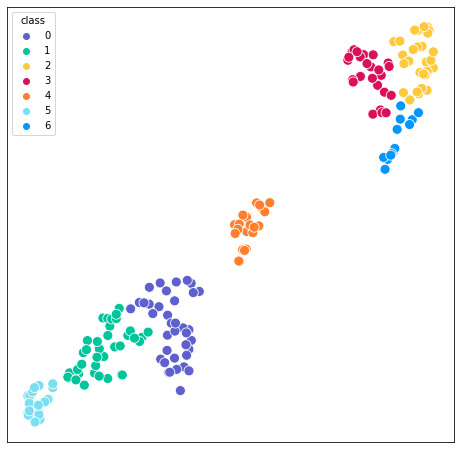

In [11]:

labels_wave_FN,mapper_FN,reducer_FN = plot_UMAP_clusters_single(fn_numpy,
                                                                20,
                                                                0.1,
                                                                random_state =42,
                                                                res_louvain = 1.,
                                                                c_list =CUSTOM_PAL_SORT_3,
                                                                size=100,
                                                                norm=False,
                                                                save=False,
                                                                savepath = savepath+'waves_cluster_FN.pdf'
                                                                )

labels_wave_SH,mapper_SH,reducer_SH = plot_UMAP_clusters_single(sh_numpy,
                                                                20,
                                                                0.1,
                                                                random_state =42,
                                                                res_louvain = 1.,
                                                                c_list =CUSTOM_PAL_SORT_3,
                                                                size=100,
                                                                norm=False,
                                                                save=False,
                                                                savepath = savepath+'waves_cluster_FN.pdf'
                                                                )

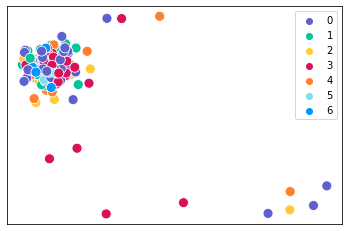

In [16]:
clusterable_embedding2d = mapper_SH.transform(fn_numpy)
fig, ax12d = plt.subplots(1,1)

df_2d_exc = {'UMAP1':clusterable_embedding2d[:, 0],
            'UMAP2':clusterable_embedding2d[:, 1],
            'class':labels_wave_SH}

ax12d.set_xticks([])
ax12d.set_yticks([])

sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',palette=CUSTOM_PAL_SORT_3[:len(set(labels_wave_SH))],ax=ax12d,s=100)
# for i in range(len(clusterable_embedding2d)):

#     plt.annotate(str(i),(clusterable_embedding2d[i,0]+0.05,clusterable_embedding2d[i,1]+0.05))

    # sns.scatterplot(data=df_2d_exc,x='UMAP1',y='UMAP2',hue='class',ax=ax12d)

    # ax12d.set_title('UMAP clusters for excitatory neurons 2D')
ax12d.legend()

# Clustering waveforms


In [13]:
waves_FN = normalize(np.vstack(FN_combined['waveform']))


## get resolution parameters FN 

In [ ]:
data_umap_scaler = StandardScaler()
find_optimum_res(data_umap_scaler.fit_transform(waves_FN),save=True,savepath=savepath+'waves_cluster_FN_stability.pdf' )

In [59]:
savepath = 'D:/Data For Publication/figures/part1/'

## clustering FN

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


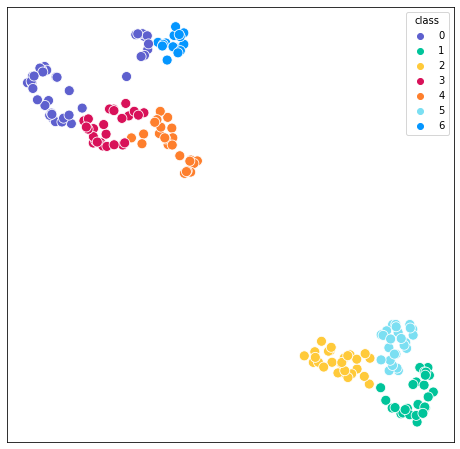

In [14]:
np.random.seed(0)
labels_wave_FN,mapper_FN,reducer_FN = plot_UMAP_clusters_single(waves_FN, #+np.random.randn(waves_FN.shape[0],waves_FN.shape[1])*5e-3,
                                                                20,
                                                                0.1,
                                                                random_state =42,
                                                                res_louvain = 1.,
                                                                c_list =CUSTOM_PAL_SORT_3,
                                                                size=100,
                                                                norm=False,
                                                                save=False,
                                                                savepath = savepath+'waves_cluster_FN.pdf'
                                                                )

## resolution SH


In [ ]:
waves_SH = normalize(np.vstack(SH_combined['waveforms']))
data_umap_scaler = StandardScaler()

find_optimum_res(data_umap_scaler.fit_transform(waves_SH),save=True,savepath=savepath+'waves_cluster_SH_stability.pdf' )

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


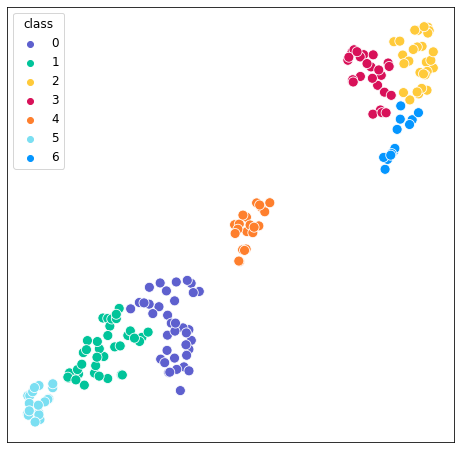

In [60]:
waves_SH = normalize(np.vstack(SH_combined['waveforms']))
np.random.seed(0)
labels_wave_SH,mapper_SH,reducer_SH = plot_UMAP_clusters_single(waves_SH, #+np.random.randn(waves_SH.shape[0],waves_SH.shape[1])*5e-3,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          size = 100,
                          c_list =CUSTOM_PAL_SORT_3,
                          norm=False,
                          save=False,
                          savepath = savepath+'SH_waves_cluster.pdf'
                          )

In [23]:
cluster_colors_SH = []
for i in labels_wave_SH:
    cluster_colors_SH.append(CUSTOM_PAL_SORT_3[i])

cluster_colors_FN = []
for i in labels_wave_FN:
    cluster_colors_FN.append(CUSTOM_PAL_SORT_3[i])    

## plot waveforms SH

0 38


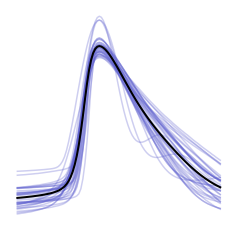

1 38


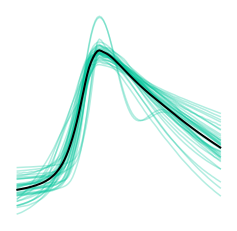

2 30


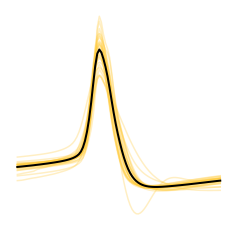

3 26


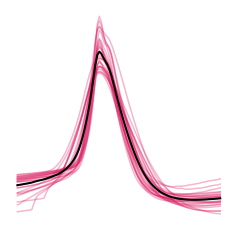

4 21


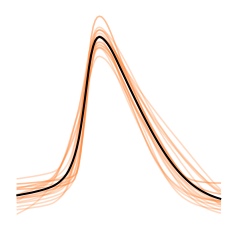

5 19


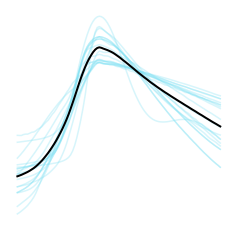

6 14


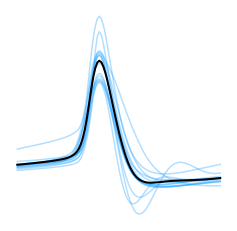

In [61]:
SH_combined['waveform_labels_SH'] = labels_wave_SH
savefolder = 'D:/Data For Publication/figures/part1/'
mean_waveform_SH = []
np.random.seed(0)
for i in set(SH_combined['waveform_labels_SH']):

    fig,ax = plt.subplots(figsize=[4,4])
    fig.patch.set_visible(False)
    ax.axis('off')
    wave_i = normalize(np.vstack(SH_combined[SH_combined['waveform_labels_SH']==i]['waveforms']))
    # wave_i += np.random.randn(wave_i.shape[0],wave_i.shape[1])*5e-3
    mean_waveform_SH.append(np.mean(wave_i.T,axis=1))
    print(i,len(wave_i)) 
    ax.plot(wave_i.T,c=CUSTOM_PAL_SORT_3[i],alpha=0.3)
    ax.plot(np.mean(wave_i.T,axis=1),c='black',alpha=1,linewidth=2)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # if os.path.exists(savefolder+'/SH_waves/'):
    #     plt.savefig(savefolder+'/SH_waves/wave_id'+str(i)+'.pdf')
    # else:
    #     os.mkdir(savefolder+'/SH_waves/')
    #     plt.savefig(savefolder+'/SH_waves/wave_id'+str(i)+'.pdf',dpi=200)

    plt.show()

## plot waveforms FN

0 37


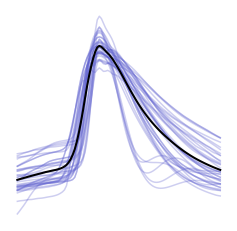

1 28


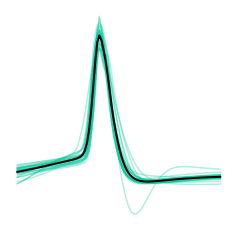

2 27


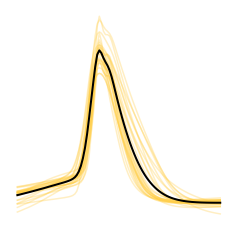

3 27


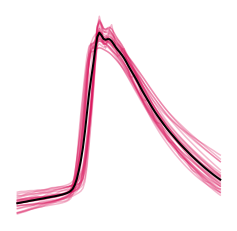

4 25


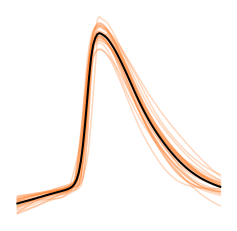

5 25


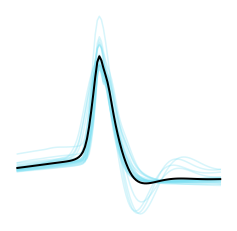

6 17


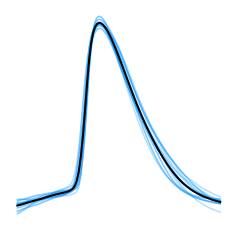

In [25]:
FN_combined['waveform_labels_FN'] = labels_wave_FN
mean_waveform_FN = []
for i in list(set(FN_combined['waveform_labels_FN'])):
    fig,ax = plt.subplots(figsize=[4,4])
    fig.patch.set_visible(False)
    ax.axis('off')
    wave_i = normalize( np.vstack(FN_combined[FN_combined['waveform_labels_FN']==i]['waveform']) )
    print(i,len(wave_i))
    # wave_i += np.random.randn(wave_i.shape[0],wave_i.shape[1])*5e-3
    ax.plot(wave_i.T,c=CUSTOM_PAL_SORT_3[i],alpha=0.3)
    ax.plot(np.mean(wave_i.T,axis=1),c='black',alpha=1,linewidth=2)
    ax.set_xticks([])
    ax.set_yticks([])
    mean_waveform_FN.append(np.mean(wave_i.T,axis=1))
    # if os.path.exists(savefolder+'/FN_waves/'):
    #     plt.savefig(savefolder+'/FN_waves/wave_id'+str(i)+'.pdf')
    # else:
    #     os.mkdir(savefolder+'/FN_waves/')
    #     plt.savefig(savefolder+'/FN_waves/wave_id'+str(i)+'.pdf',dpi=200)

    plt.show()

## measure similarity

In [84]:
def plot_cosine_mat(data1,data2,label1,label2):
    cosine_mat = np.zeros((len(set(label1)),len(set(label2))))
    sim_data = cosine_similarity(data1,data2)
    for i in set(label1):
        for j in set(label2):
            idx_FN = label1==i
            idx_SH = label2==j
            cosine_mat[i,j] = np.mean(sim_data[:,idx_FN][idx_SH])
    return cosine_mat
data1 = normalize(np.vstack(SH_combined['waveforms']))
data2 = normalize(np.vstack(FN_combined['waveform']))
cosine_mat = plot_cosine_mat(data1,data2,FN_combined.waveform_labels_FN,SH_combined.waveform_labels_SH)
cosine_mat_FN = plot_cosine_mat(data2,data2,FN_combined.waveform_labels_FN,FN_combined.waveform_labels_FN)
cosine_mat_SH = plot_cosine_mat(data1,data1,SH_combined.waveform_labels_SH,SH_combined.waveform_labels_SH)


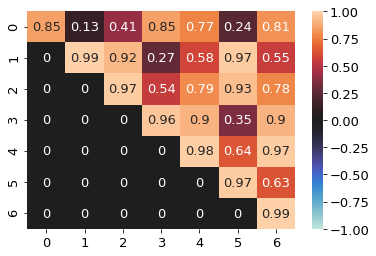

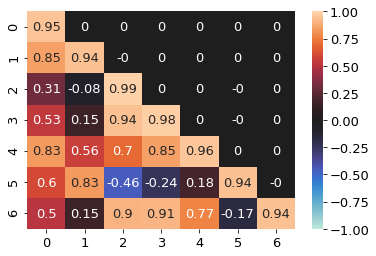

In [28]:
plt.rcParams['font.size'] =13

sns.heatmap(np.around(cosine_mat_FN*np.triu(np.ones_like(cosine_mat_FN)),2),vmax=1,vmin=-1,annot=True,cmap='icefire')
plt.savefig(savefolder+'FN_FN_cosine_similarity.pdf',dpi=200)
plt.show()
sns.heatmap(np.around(cosine_mat_SH*np.tril(np.ones_like(cosine_mat_SH)),2),vmax=1,vmin=-1,annot=True,cmap='icefire')
plt.savefig(savefolder+'SH_SH_cosine_similarity.pdf',dpi=200)

plt.show()

In [29]:
import numpy as np
import scipy.stats as st

#define sample data
np.random.seed(0)
data = np.random.randint(10, 30, 50)

#create 95% confidence interval for population mean weight
for i in range(cosine_mat.shape[1]):
    print(st.norm.interval(alpha=0.95, loc=np.mean(cosine_mat[:,i]), scale=st.sem(cosine_mat[:,i])))



(0.47218909510866164, 0.892531214971948)
(0.13043919163928808, 0.735045070097278)
(0.4071871665031169, 0.8948192840689279)
(0.5862124899495063, 0.9159062461995364)
(0.7262042757744253, 0.894385032714)
(-0.24519632386048282, 0.45006207502065665)
(0.5444005670478161, 0.8561199581057742)


<ipython-input-29-e73c5357a9e8>:10: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  print(st.norm.interval(alpha=0.95, loc=np.mean(cosine_mat[:,i]), scale=st.sem(cosine_mat[:,i])))


In [43]:

def return_confusion_matrix_(df1,df2,label1_name,label2_name,figsize =[12,5] ,vmin=0,vmax=100,shuffle = False,save=False,savepath=None,cmap='BrBG_r'):
    plt.rcParams['font.size']=12

    np.random.seed(42)
    if shuffle:
        fig,ax1 = plt.subplots(figsize =figsize )
        df = pd.DataFrame(columns=['label1','label2'])
        # df['exp_name1'] = df1.exp_name
        # df['exp_name2'] = df2.exp_name
        
        label1 = list(df1[label1_name])
        np.random.shuffle(label1)
        label2 = list(df2[label2_name])
        np.random.shuffle(label2)

        df['label1_sh'] = label1
        df['label2_sh'] = label2

        df['label1'] = np.array(df1[label1_name]) 
        df['label2'] = np.array(df2[label2_name])

        mat_orig = np.zeros((len(set(df1[label1_name])),len(set(df2[label2_name]))))
        for i in np.unique(df.label1):
            data_ = np.unique(df[df.label1==i]['label2'],return_counts=True)
            mat_orig[i,data_[0]] =(data_[1]/np.sum(data_[1])) 

        mat_sh = np.zeros((len(set(df['label1_sh'])),len(set(df['label2_sh']))))
        mat_sh[:,:] = int(100/len(set(df1[label1_name])))
        # for i in np.unique(df.label1_sh):
        #     data_ = np.unique(df[df.label1_sh==i]['label2_sh'],return_counts=True)
        #     mat_sh[i,data_[0]] =(data_[1]/np.sum(data_[1]))*100 

        sns.heatmap(mat_orig,cmap=cmap,annot=True,ax=ax1,vmin=vmin,vmax=vmax) 
        if save:
            plt.savefig(savepath,dpi=300)
        else:
            plt.show()

    else:
        fig,ax1 = plt.subplots(figsize =figsize )

        df = pd.DataFrame(columns=['label1','label2'])
        # df['exp_name1'] = df1.exp_name
        # df['exp_name2'] = df2.exp_name
        df['label1'] = np.array(df1[label1_name])
        df['label2'] = np.array(df2[label2_name])

        mat = np.zeros((len(set(df1[label1_name])),len(set(df2[label2_name]))))

        for i in np.unique(df.label1):
            data_ = np.unique(df[df.label1==i]['label2'],return_counts=True)
            mat[i,data_[0]] =(data_[1]/np.sum(data_[1]))

        sns.heatmap(mat,cmap=cmap,annot=True,vmin=vmin,vmax=vmax,ax=ax1) 
        if save:
            plt.savefig(savepath,dpi=300)
        else:
            plt.show()



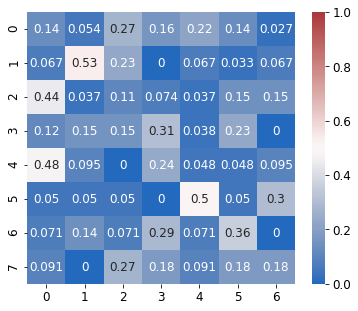

In [70]:
return_confusion_matrix_(SH_combined,FN_combined,'waveform_labels_SH','waveform_labels_FN',shuffle=False,cmap='vlag',vmin=0,vmax=1,figsize=[6,5],save=True,savepath=savefolder+'SH_FN_prob_heatmap.pdf')

In [71]:
def cluster_matrix(df_cluster,label1,label2,figsize=[6,5]):
    fig,ax = plt.subplots(figsize = figsize)
    c1 = df_cluster[label1]
    c2 = df_cluster[label1]
    prob_map = np.zeros((len(set(c1)),len(set(c2))))
    for i in set(c1):
        idx = np.unique(df_cluster[df_cluster[label1]==i][label2],return_counts=True)[0]
        counts = np.unique(df_cluster[df_cluster[label1]==i][label2],return_counts=True)[1]
        prob  = counts/np.sum(counts)
        prob_map[i,idx] = prob
    sns.heatmap(prob_map,cmap='vlag',vmax=1,vmin=0,annot=True)
cluster_matrix(df_cluster,'SH_cluster_ID','FN_cluster_ID',figsize = [7,6]) 

NameError: name 'df_cluster' is not defined

<Axes: >

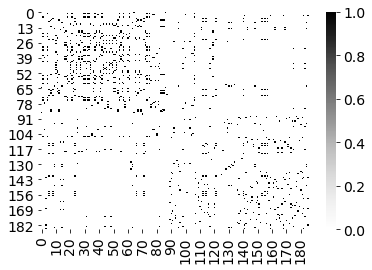

In [ ]:
def co_association_matrix(labels):
    n = len(labels)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            # if i>j:
                if i!=j:
                    if labels[i] == labels[j]:
                        matrix[i, j] = 1
    return matrix

# Example cluster labels
L1 = [0, 0, 1, 1, 2, 2]
L2 = [1, 1, 0, 0, 2, 2]

# Compute co-association matrices
C1 = co_association_matrix(df_cluster['SH_cluster_ID'])
C2 = co_association_matrix(df_cluster['FN_cluster_ID'])

# Average the co-association matrices
average_co_assoc_matrix = np.int32((C1 + C2) / 2)
sns.heatmap(average_co_assoc_matrix,cmap='Greys')
# print("Co-Association Matrix 1:\n", C1)
# print("Co-Association Matrix 2:\n", C2)
# print("Averaged Co-Association Matrix:\n", average_co_assoc_matrix)


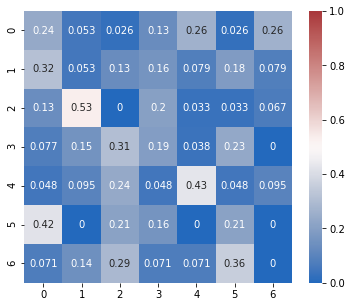

In [ ]:
return_confusion_matrix_(SH_combined,FN_combined,'waveform_labels_SH','waveform_labels_FN',figsize=[6,5],vmin=0,vmax=1,shuffle=True,save=False,cmap='vlag',savepath =savefolder+'confusion_matrix_waveform_SH.pdf')

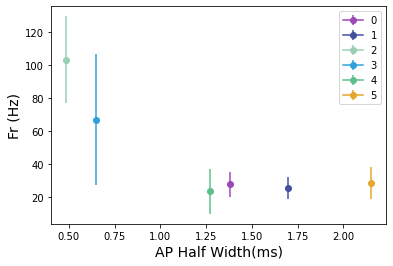

In [ ]:
frs = []
ap_width = []  
frs_std = []
ap_width_std = []

for i in set(SH_combined['waveform_labels_SH']):
    frs.append(np.mean(SH_combined[SH_combined.waveform_labels_SH==i]['fr']))
    frs_std.append(np.std(SH_combined[SH_combined.waveform_labels_SH==i]['fr']))

    ap_width.append(np.mean(SH_combined[SH_combined.waveform_labels_SH==i]['mean_width']))
    ap_width_std.append(np.std(SH_combined[SH_combined.waveform_labels_SH==i]['mean_width']))

# plt.errorbar(list(set(SH_combined['waveform_labels_SH'])),frs,yerr=frs_std,marker='o',c='black')
# # plt.hlines(4,0,8,linestyles='dashed',color='grey')
# plt.ylabel('Fr (Hz)')
# plt.xlabel('class')
# plt.show()

for i in range(len(ap_width)):
    plt.errorbar(ap_width[i],frs[i],marker='o',c=coherence_colors[i],yerr=frs_std[i],label = list(set(SH_combined['waveform_labels_SH']))[i])
    plt.ylabel('Fr (Hz)',fontsize=14)
    plt.xlabel('AP Half Width(ms)',fontsize=14)
    plt.legend()
plt.savefig(savefolder+'SH_FR_V_AP_width.pdf',dpi=300)
# plt.show()

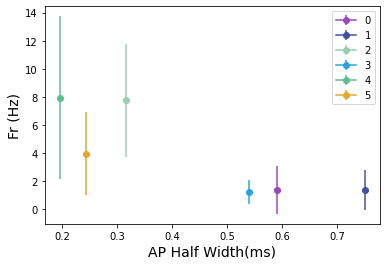

In [ ]:
frs = []
ap_width = []  
frs_std = []
ap_width_std = []

for i in set(FN_combined['waveform_labels_FN']):
    frs.append(np.mean(FN_combined[FN_combined.waveform_labels_FN==i]['fr']))
    frs_std.append(np.std(FN_combined[FN_combined.waveform_labels_FN==i]['fr']))

    ap_width.append(np.mean(FN_combined[FN_combined.waveform_labels_FN==i]['mean_width']))
    ap_width_std.append(np.std(FN_combined[FN_combined.waveform_labels_FN==i]['mean_width']))

# plt.errorbar(list(set(FN_combined['waveform_labels_FN'])),frs,yerr=frs_std,marker='o',c='black')
# # plt.hlines(4,0,8,linestyles='dashed',color='grey')
# plt.ylabel('Fr (Hz)')
# plt.xlabel('class')
# plt.show()


for i in range(len(ap_width)):
    plt.errorbar(ap_width[i],frs[i],marker='o',c=coherence_colors[i],yerr=frs_std[i],label = list(set(FN_combined['waveform_labels_FN']))[i])
    plt.ylabel('Fr (Hz)',fontsize=14)
    plt.xlabel('AP Half Width(ms)',fontsize=14)
    plt.legend()
plt.savefig(savefolder+'FN_FR_V_AP_width.pdf',dpi=300)

## decision tree

In [ ]:
from xg_boost_classifier import  * 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 89.91104133961277


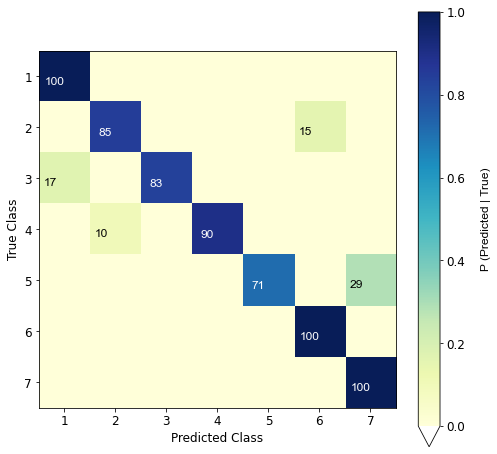

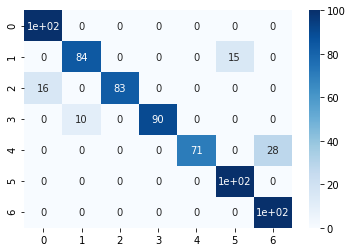

In [ ]:
matrix_fn_waves = return_xg_boost_trees_classification(FN_combined['waveform'],FN_combined.waveform_labels_FN)
plt.show()
sns.heatmap(np.int32(matrix_fn_waves*100),cmap='Blues',annot=True)
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 80.52083333333333


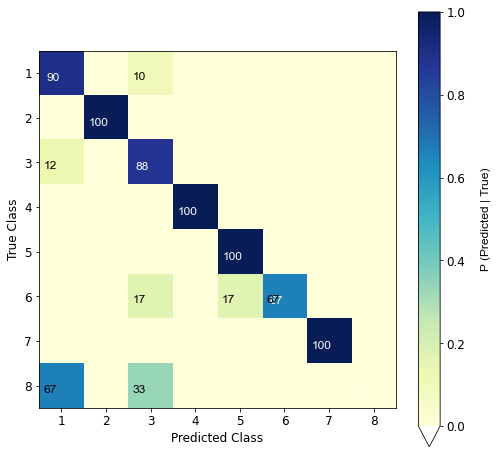

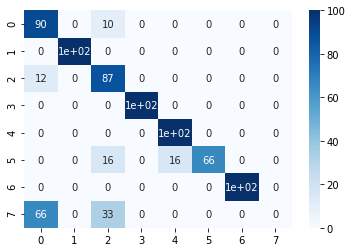

In [ ]:
matrix_sh_waves = return_xg_boost_trees_classification(SH_combined['waveforms'],SH_combined.waveform_labels_SH)
plt.show()
sns.heatmap(np.int32(matrix_sh_waves*100),cmap='Blues',annot=True)
plt.show()

# EPhys clusters

In [72]:
cols = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'max_isi', 'min_isi', 'median_isi',
       'first_thr', 'mean_thr', 'max_thr', 'min_thr', 'median_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude','max_amplitude', 'min_amplitude',]
data_umap_scaler = StandardScaler()

ephys_data_sh = data_umap_scaler.fit_transform(normalize(np.vstack(SH_combined[cols].to_numpy()),axis=0))

# find_optimum_res(ephys_data_sh,save=True,savepath=savepath+'ephys_cluster_SH_stability.pdf')

## clustering SH

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


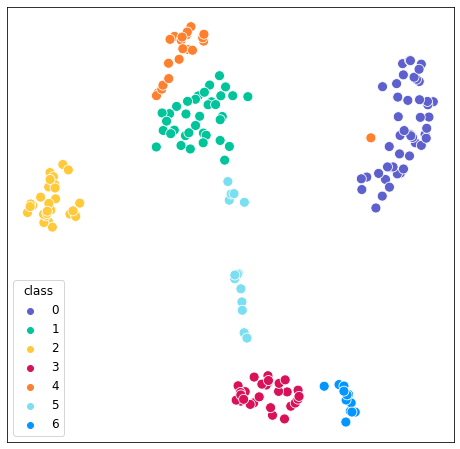

In [78]:
ephys_data_sh = normalize(np.vstack(SH_combined[cols].to_numpy()),axis=0)

lables_ephys_exc,mapper,reducer = plot_UMAP_clusters_single(ephys_data_sh,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,                          
                          size = 100,
                          c_list =CUSTOM_PAL_SORT_3,
                          norm=False,
                          save=False,
                          savepath = savepath+'SH_ephys_cluster.pdf')
SH_combined['labels_ephys'] = lables_ephys_exc

## load FN data

In [74]:
cols = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'max_isi', 'min_isi', 'median_isi',
       'first_thr', 'mean_thr', 'max_thr', 'min_thr', 'median_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude','max_amplitude', 'min_amplitude',]
data_umap_scaler = StandardScaler()

ephys_data_fn =data_umap_scaler.fit_transform(normalize(np.vstack(FN_combined[cols].to_numpy()),axis=0))



## resolution FN

In [ ]:
data_umap_scaler = StandardScaler()

find_optimum_res(data_umap_scaler.fit_transform(ephys_data_fn),save=True,savepath=savepath+'ephys_cluster_FN_stability.pdf')

## clustering FN

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


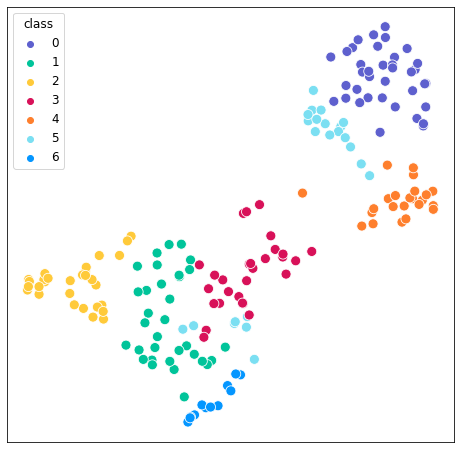

In [77]:

lables_ephys_exc,mapper,reducer = plot_UMAP_clusters_single(ephys_data_fn,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          size = 100,
                          c_list =CUSTOM_PAL_SORT_3,
                          norm=False,
                          save=False,
                          savepath = savepath+'FN_ephys_cluster.pdf')
                          
FN_combined['labels_ephys'] = lables_ephys_exc

In [ ]:
savefolder+'Confusion_matrix_FN_SH_ephys.pdf'

'D:/Data For Publication/figures/part1/Confusion_matrix_FN_SH_ephys.pdf'

## compare clustering

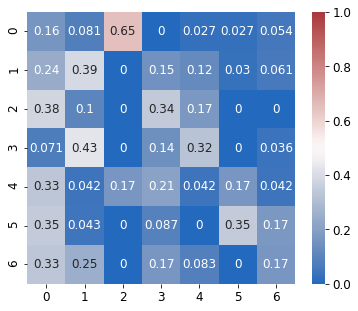

In [79]:
return_confusion_matrix_(FN_combined,SH_combined,'labels_ephys','labels_ephys',vmin=0,vmax=1,figsize=[6,5],shuffle=False, save=True,cmap='vlag',
                          savepath = savefolder+'Confusion_matrix_FN_SH_ephys.pdf')

In [ ]:
sh_mean_ephys = []
fn_mean_ephys = []
for i in set(FN_combined.labels_ephys):
    fn_mean_ephys.append(np.mean(FN_combined[FN_combined.labels_ephys==i][cols].to_numpy(),axis=0))
for i in set(SH_combined.labels_ephys):
    sh_mean_ephys.append(np.mean(SH_combined[SH_combined.labels_ephys==i][cols].to_numpy(),axis=0))    

## measure similarity

In [86]:
def plot_cosine_mat(data1,data2,label1,label2):
    cosine_mat = np.zeros((len(set(label1)),len(set(label2))))
    sim_data = cosine_similarity(data1,data2)
    for i in set(label1):
        for j in set(label2):
            idx_FN = label1==i
            idx_SH = label2==j
            cosine_mat[i,j] = np.mean(sim_data[:,idx_FN][idx_SH])
    return cosine_mat
data1 = normalize(np.vstack(SH_combined[cols].to_numpy()))
data2 = normalize(np.vstack(FN_combined[cols].to_numpy()))
cosine_mat = plot_cosine_mat(data1,data2,FN_combined.labels_ephys,SH_combined.labels_ephys)


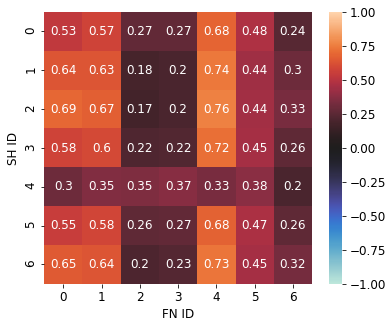

In [88]:
fig,ax = plt.subplots(figsize=[6,5])
sns.heatmap(cosine_mat,
            cmap='icefire',
            annot=True,
            vmin=-1,
            vmax=1)
plt.xlabel('FN ID')
plt.ylabel('SH ID')
plt.savefig(savefolder+'/cosine_similarity_FN_SH_ephys.pdf',dpi=200)

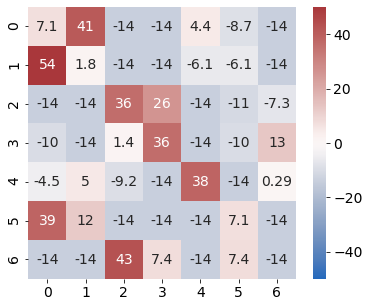

In [ ]:
return_confusion_matrix_(SH_combined,SH_combined,'waveform_labels_SH','labels_ephys',vmin=-50,vmax=50,figsize=[6,5],shuffle=True, save=True,cmap='vlag',
                          savepath = savefolder+'Confusion_matrix_SH_ephys_waveform.pdf')

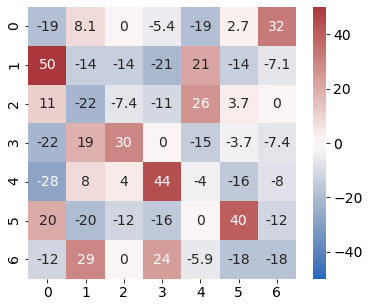

In [ ]:
return_confusion_matrix_(FN_combined,FN_combined,'waveform_labels_FN','labels_ephys',vmin=-50,vmax=50,figsize=[6,5],shuffle=True,save=True,cmap='vlag',
                          savepath = savefolder+'Confusion_matrix_FN_ephys_waveform.pdf')

## decision tree

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 89.84126984126985
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 70.4090354090354


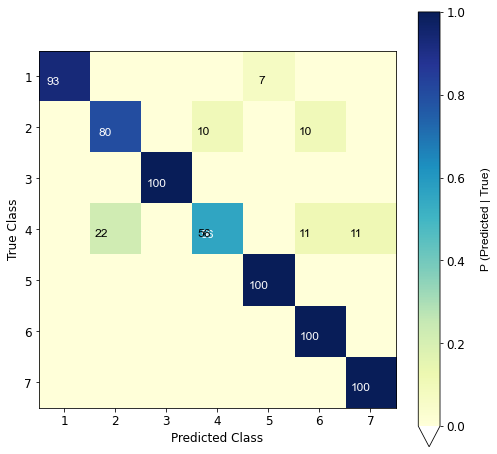

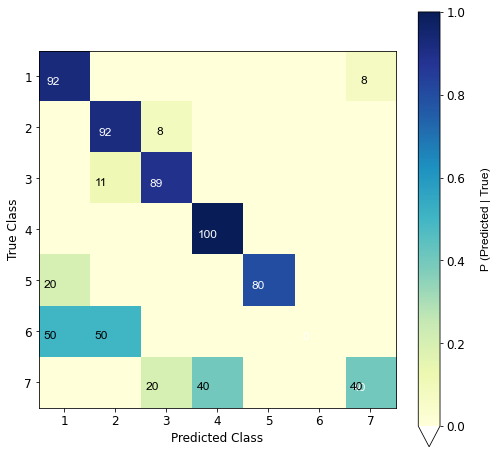

In [ ]:
matrix_fn_ephys = return_xg_boost_trees_classification(FN_combined[cols].to_numpy(),FN_combined.labels_ephys)
matrix_sh_ephys = return_xg_boost_trees_classification(SH_combined[cols].to_numpy(),SH_combined.labels_ephys)

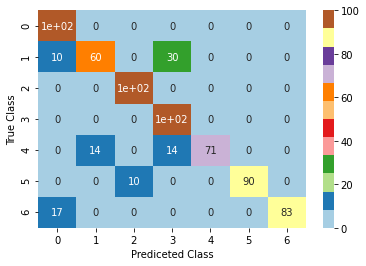

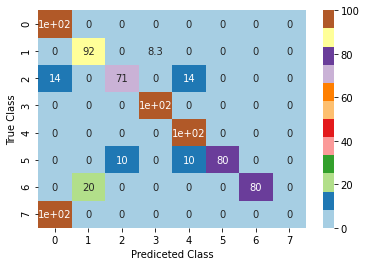

In [ ]:
sns.heatmap(matrix_fn_waves*100,annot=True,cmap='Paired')
plt.xlabel('Prediceted Class')
plt.ylabel('True Class')
plt.show()

sns.heatmap(matrix_sh_waves*100,annot=True,cmap='Paired')
plt.xlabel('Prediceted Class')
plt.ylabel('True Class')
plt.show()

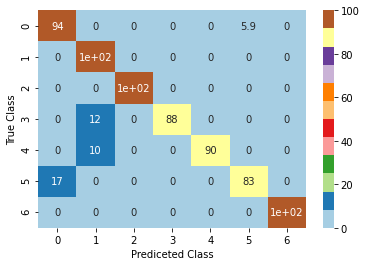

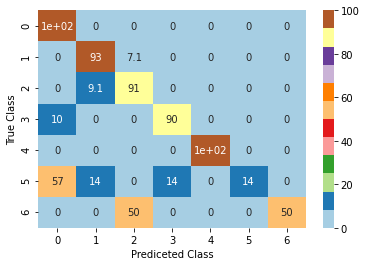

In [ ]:
sns.heatmap(matrix_fn_ephys*100,annot=True,cmap='Paired')
plt.xlabel('Prediceted Class')
plt.ylabel('True Class')
plt.show()

sns.heatmap(matrix_sh_ephys*100,annot=True,cmap='Paired')
plt.xlabel('Prediceted Class')
plt.ylabel('True Class')
plt.show()

<Axes: xlabel='labels_ephys', ylabel='Count'>

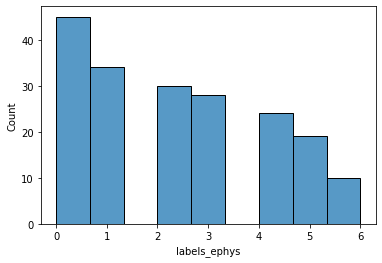

In [ ]:
sns.histplot(FN_combined.labels_ephys)

## clustering scores

In [ ]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

print((adjusted_rand_score(FN_combined.labels_ephys,SH_combined.labels_ephys) ,
adjusted_mutual_info_score(FN_combined.labels_ephys,SH_combined.labels_ephys)))



(0.14922142029788482, 0.2067145570680569)


In [ ]:
print((adjusted_rand_score(FN_combined.waveform_labels_FN,SH_combined.waveform_labels_SH) ,
adjusted_mutual_info_score(FN_combined.waveform_labels_FN,SH_combined.waveform_labels_SH)))



(0.08508653586750443, 0.13310361582434083)


<Axes: >

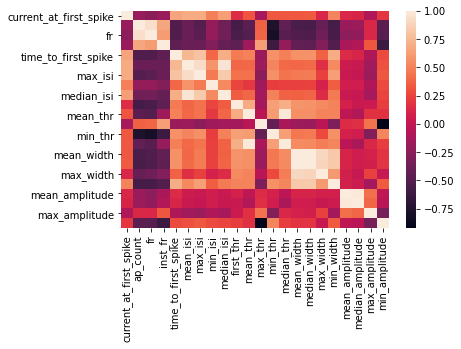

In [ ]:
sns.heatmap(FN_combined[cols].corr())

## radar plots

In [ ]:
cols_spikes   = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr','time_to_first_spike', 'mean_isi', 'median_isi', 'max_isi', 'min_isi',]
cols_thrs     = ['first_thr', 'mean_thr', 'median_thr', 'min_thr', 'max_thr',]
cols_wf       = ['mean_width', 'median_width', 'max_width', 'min_width','mean_amplitude', 'median_amplitude', 'min_amplitude', 'max_amplitude',]

In [ ]:
savepath = 'D:/Data For Publication/figures/part1/'

In [ ]:


def plot_radar(data,cols,labels,figsize=(6, 6),lims=None,palette=None,logscale=True,save=False,savepath=None,):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))

    cols_ = cols
    data_norm = normalize(data[cols_].to_numpy(),axis=0)
    # Data
    categories = cols_
    for i in list(set(labels)):
        idx = labels==i
        values_1 = data_norm[idx,:]

        # Number of variables we're plotting.
        num_vars = len(cols_)

        # Compute angle of each axis.
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

        # The plot is a circle, so we need to "complete the loop".
        # Append the start value to the end.
        values_1 = np.insert(values_1,[values_1.shape[1]],values_1[:,:1],axis=1)
        angles += angles[:1]

        # Create the figure.

        # Draw one axe per variable and add labels.
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        plt.xticks(angles[:-1], categories,fontsize=12,)
        for label, angle in zip(ax.get_xticklabels(), angles):
            x, y = label.get_position()
            label.set_position((x, y-0.2 ))  # Adjust the value to move labels further out

        # Draw ylabels.
        if logscale:
            ax.set_rscale('log')
            ax.plot(angles, values_1.T, linewidth=1,c=palette[i], linestyle='solid',alpha=0.1 )
            ax.plot(angles, np.mean(values_1.T,axis=1), linewidth=3,c=palette[i], linestyle='solid',alpha=.8 )
            ax.set_ylim(lims)

        else:
            # ax.set_rscale('log')

            ax.plot(angles, values_1.T, linewidth=1,c=palette[i], linestyle='solid',alpha=0.1 )

            ax.plot(angles, np.mean(values_1.T,axis=1), linewidth=3,c=palette[i], linestyle='solid',alpha=.8 )
            ax.set_ylim(lims)

    if save:
        plt.savefig(savepath,dpi=200)
    else:
        plt.show()

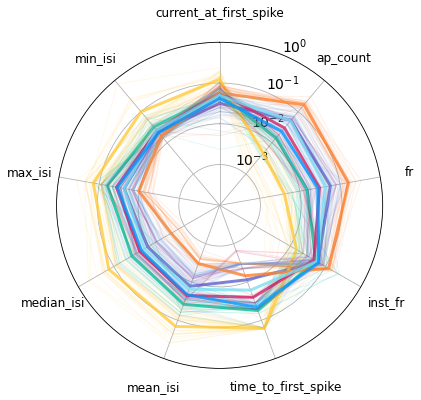

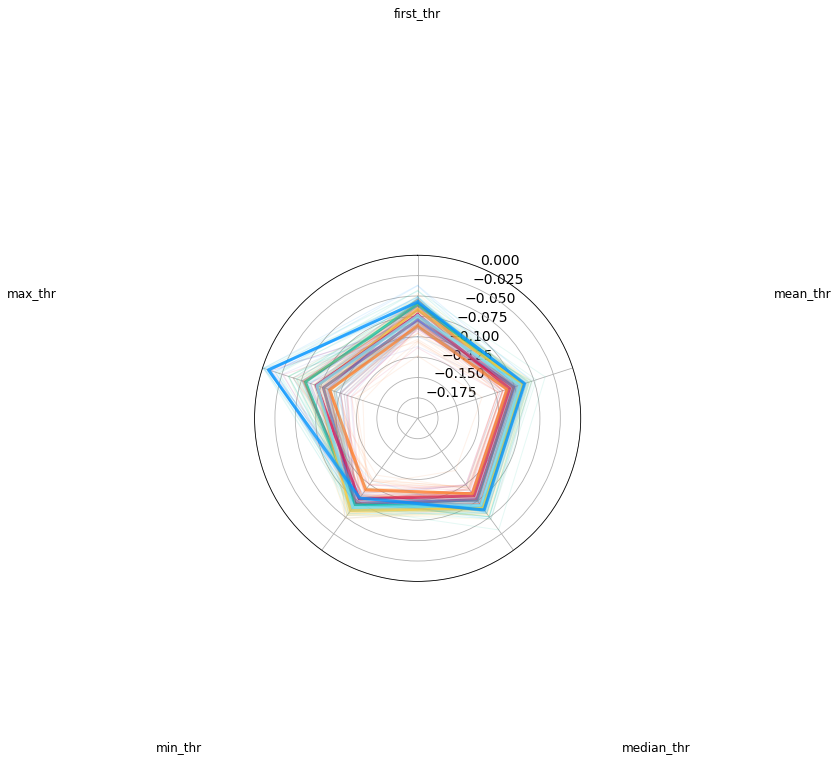

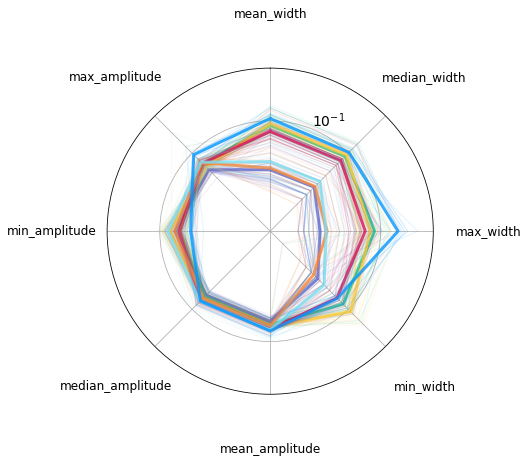

In [ ]:
plot_radar(FN_combined,cols_spikes,FN_combined.labels_ephys,lims=(1e-4,1e0) , palette=CUSTOM_PAL_SORT_3,save=True,savepath=savepath+'FN_spikes_radar.pdf')
plot_radar(FN_combined,cols_thrs,FN_combined.labels_ephys  ,lims=(-0.2,0.0) , palette=CUSTOM_PAL_SORT_3,logscale = False,save=True,savepath=savepath+'FN_thrs_radar.pdf')
plot_radar(FN_combined,cols_wf,FN_combined.labels_ephys    ,lims=(1e-2,3e-1),palette=CUSTOM_PAL_SORT_3,save=True,savepath=savepath+'FN_wave_radar.pdf')

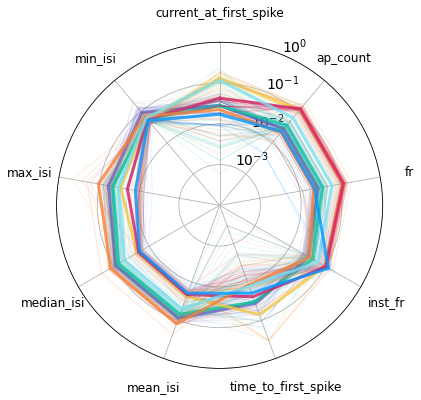

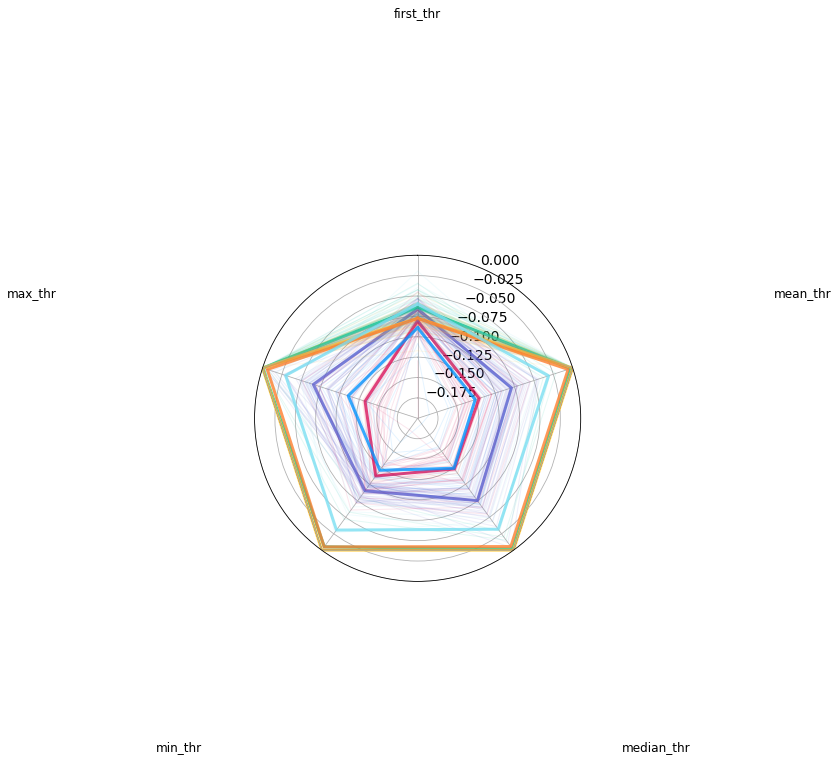

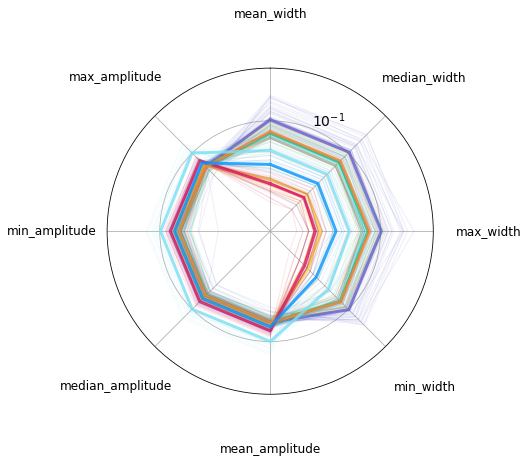

In [ ]:
plot_radar(np.abs(SH_combined[cols_spikes]),cols_spikes,SH_combined.labels_ephys,lims=(1e-4,1e0) ,palette=CUSTOM_PAL_SORT_3,save=True,savepath=savepath+'SH_spikes_radar.pdf')
plot_radar(SH_combined[cols_thrs],cols_thrs,SH_combined.labels_ephys  ,lims=(-0.2,0.0) ,palette=CUSTOM_PAL_SORT_3,logscale = False,save=True,savepath=savepath+'SH_thrs_radar.pdf')
plot_radar(SH_combined[cols_wf],cols_wf,SH_combined.labels_ephys   ,lims=(1e-2,3e-1),palette=CUSTOM_PAL_SORT_3,save=True,savepath=savepath+'SH_wave_radar.pdf')


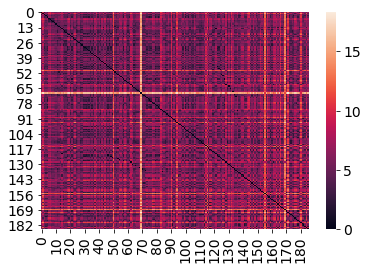

<Axes: >

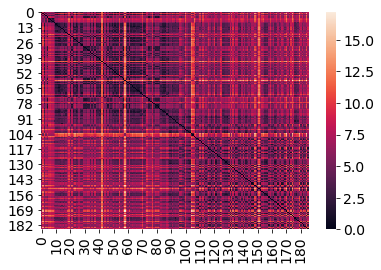

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

# Example data (replace these with your actual data)
# electrophysiological_data = 
# biophysical_data = 
# spike_triggered_average_data = 

# Step 1: Normalize the data
scaler = StandardScaler()
FN_data = scaler.fit_transform(FN_combined[cols])
SH_data = scaler.fit_transform(SH_combined[cols])

# Step 2: Calculate pairwise distances within each modality
def calculate_pairwise_distances(data, metric='minkowski'):
    return squareform(pdist(data, metric))

electrophysiological_distances = calculate_pairwise_distances(FN_data)
biophysical_distances = calculate_pairwise_distances(SH_data)
sns.heatmap(electrophysiological_distances)

plt.show()
sns.heatmap(biophysical_distances)


## comparing properties individually

In [15]:
from sklearn.decomposition import PCA


pca = PCA(n_components=1)

val_spks = pca.fit_transform(SH_combined[cols_spikes])

val_thrs = pca.fit_transform(SH_combined[cols_thrs])

val_wf = pca.fit_transform(SH_combined[cols_wf])
std = StandardScaler()

plot_UMAP_values(SH_combined[cols],std.fit_transform(val_spks),random_state=42)
# plt.savefig(savefolder+'SH_PCA_spikes.pdf',dpi=200)

plot_UMAP_values(SH_combined[cols],std.fit_transform(val_thrs),random_state=42)
# plt.savefig(savefolder+'SH_PCA_thrs.pdf',dpi=200)


plot_UMAP_values(SH_combined[cols],std.fit_transform(val_wf),random_state=42)
# plt.savefig(savefolder+'SH_PCA_wf.pdf',dpi=200)

NameError: name 'cols_spikes' is not defined

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


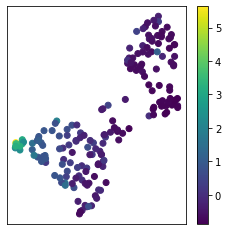

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 432x288 with 0 Axes>

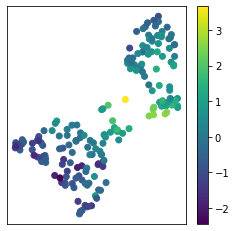

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 432x288 with 0 Axes>

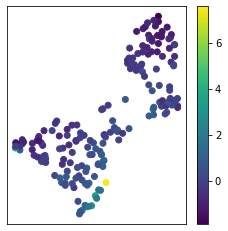

<Figure size 432x288 with 0 Axes>

In [ ]:
pca = PCA(n_components=1)

val_spks = pca.fit_transform(FN_combined[cols_spikes])

val_thrs = pca.fit_transform(FN_combined[cols_thrs])

val_wf = pca.fit_transform(FN_combined[cols_wf])


plot_UMAP_values(FN_combined[cols],std.fit_transform(val_spks),random_state=42)
plt.savefig(savefolder+'FN_PCA_spikes.pdf',dpi=200)


plot_UMAP_values(FN_combined[cols],std.fit_transform(val_thrs),random_state=42)
plt.savefig(savefolder+'FN_PCA_thrs.pdf',dpi=200)



plot_UMAP_values(FN_combined[cols],std.fit_transform(val_wf),random_state=42)
plt.savefig(savefolder+'FN_PCA_wf.pdf',dpi=200)


current_at_first_spike


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


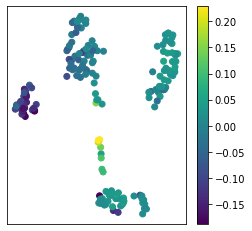

ap_count


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


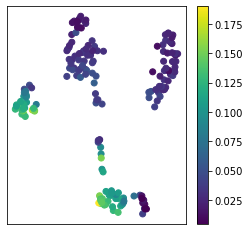

fr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


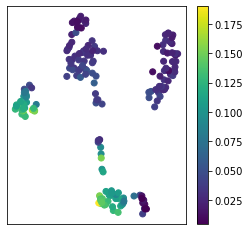

inst_fr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


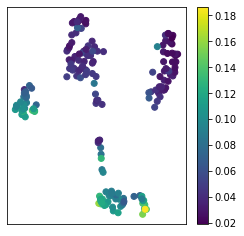

time_to_first_spike


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


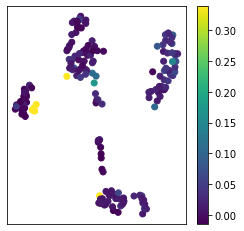

mean_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


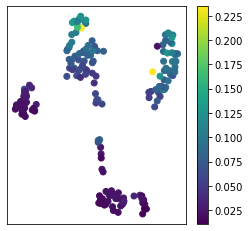

max_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


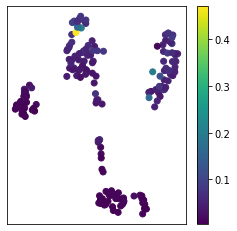

min_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


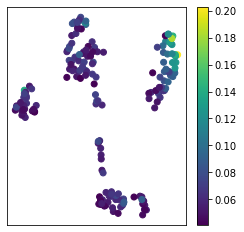

median_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


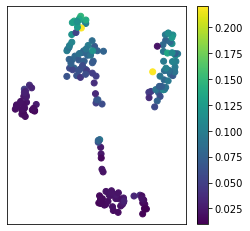

first_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


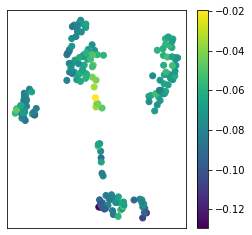

mean_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


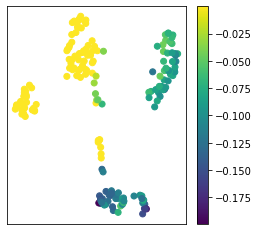

max_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


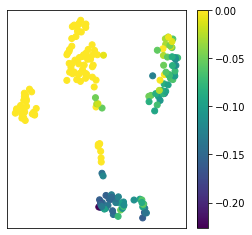

min_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


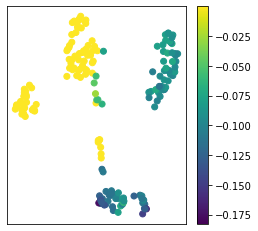

median_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


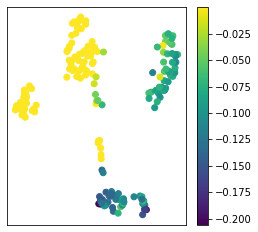

mean_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


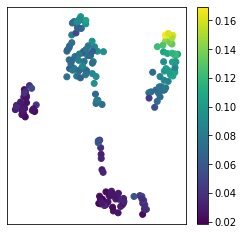

median_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


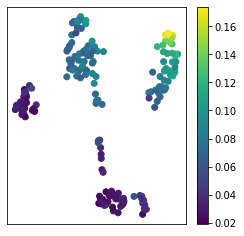

max_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


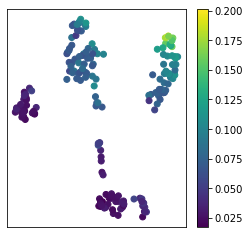

min_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


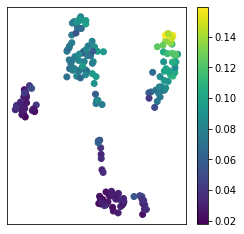

mean_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


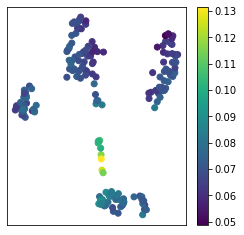

median_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


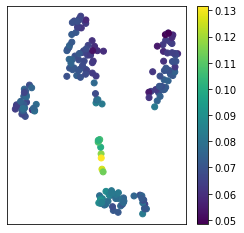

max_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


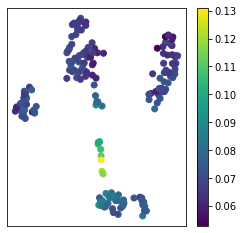

min_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


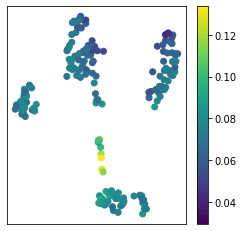

In [ ]:
for i in cols:
    print(i)
    val = SH_combined[i].to_numpy().reshape(-1,1)/np.linalg.norm(SH_combined[i].to_numpy().reshape(-1,1))
    plot_UMAP_values(SH_combined[cols],val,random_state=42)
    plt.show()

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


current_at_first_spike


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


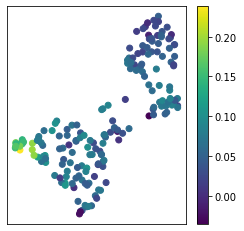

ap_count


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


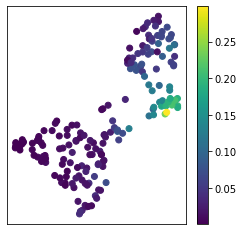

fr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


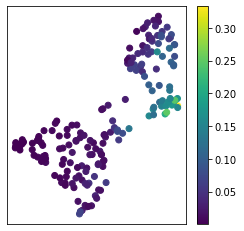

inst_fr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


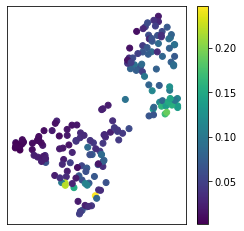

time_to_first_spike


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


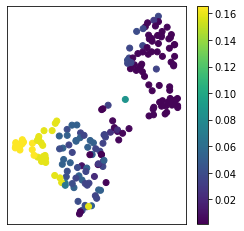

mean_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


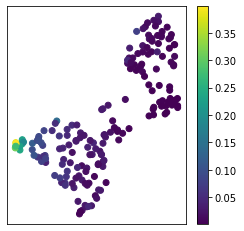

max_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


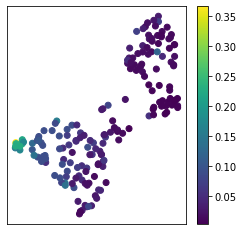

min_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


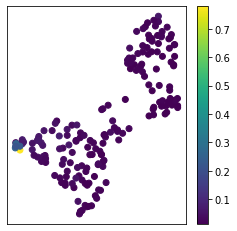

median_isi


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


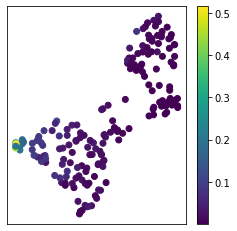

first_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


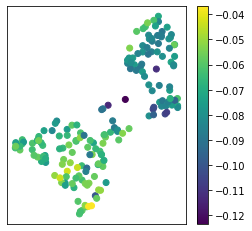

mean_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


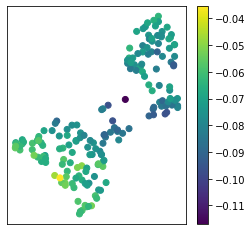

max_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


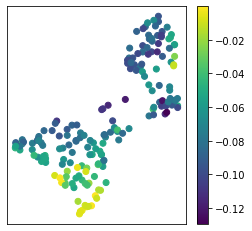

min_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


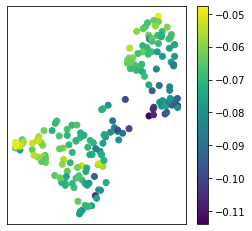

median_thr


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


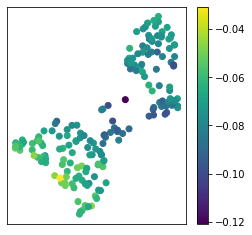

mean_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


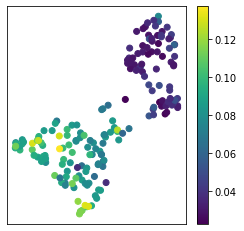

median_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


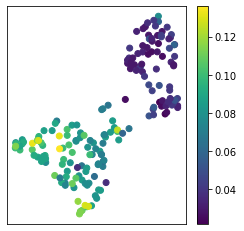

max_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


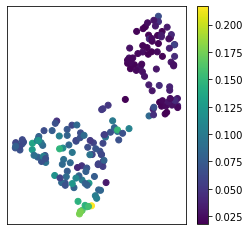

min_width


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


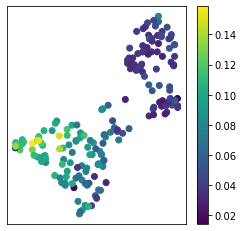

mean_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


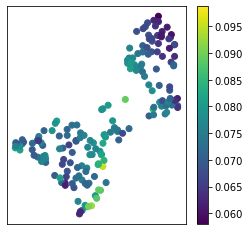

median_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


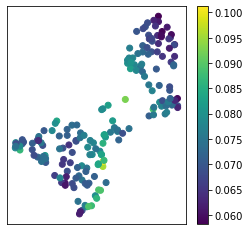

max_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


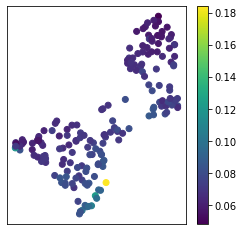

min_amplitude


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


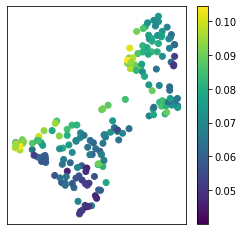

In [ ]:
for i in cols:
    print(i)
    val = FN_combined[i].to_numpy().reshape(-1,1)/np.linalg.norm(FN_combined[i].to_numpy().reshape(-1,1))
    plot_UMAP_values(FN_combined[cols],val,random_state=42)
    plt.show()

# Ensemble clustering

In [15]:
import igraph as ig
import random 
import umap as umap
import networkx as nx


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


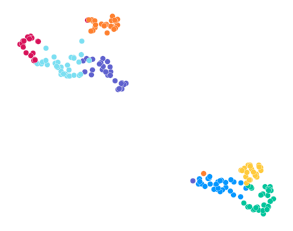

In [20]:
# add ECG to the choice of community algorithms
def community_ecg(self, weights=None, ens_size=10, min_weight=0.05):
    W = [0]*self.ecount()
    ## Ensemble of level-1 Louvain 
    for i in range(ens_size):
        p = np.random.permutation(self.vcount()).tolist()
        g = self.permute_vertices(p)
        l = g.community_multilevel(weights=weights, return_levels=True)[0].membership
        b = [l[p[x.tuple[0]]]==l[p[x.tuple[1]]] for x in self.es]
        W = [W[i]+b[i] for i in range(len(W))]
    W = [min_weight + (1-min_weight)*W[i]/ens_size for i in range(len(W))]
    ## Force min_weight outside 2-core
    core = self.shell_index()
    ecore = [min(core[x.tuple[0]],core[x.tuple[1]]) for x in self.es]
    w = [W[i] if ecore[i]>1 else min_weight for i in range(len(ecore))]
    part = self.community_multilevel(weights=w)
    part.W = w
    part.CSI = 1-2*np.sum([min(1-i,i) for i in w])/len(w)
    return part

ig.Graph.community_ecg = community_ecg

def readGraph(fn, directed=False):
    g = ig.Graph.Read_Ncol(fn+'.edgelist',directed=directed)
    c = np.loadtxt(fn+'.community',dtype='uint8')
    node_base = min([int(x['name']) for x in g.vs]) ## graphs have 1-based or 0-based nodes 
    comm_base = min(c) ## same for communities
    comm = [c[int(x['name'])-node_base]-comm_base for x in g.vs]
    g.vs['community'] = comm
    g.vs['shape'] = 'circle'
    pal = ig.RainbowPalette(n=max(comm)+1)
    g.vs['color'] = [pal.get(int(i)) for i in comm]
    g.vs['size'] = 10
    g.es['width'] = 1
    return g

full_data = normalize(np.vstack(FN_combined['waveform']))
# full_data = normalize(np.vstack(SH_combined['waveforms']))
data_umap_scaler = StandardScaler()
full_data = data_umap_scaler.fit_transform(full_data)

rand_data = full_data[0:(int(len(full_data))),:]
my_umap = umap.UMAP(n_neighbors=20,
                    min_dist=0.1,
                    random_state=42)
                    # random.randint(0,10000))

my_umap.fit(rand_data)
my_umap_embedding = my_umap.transform(rand_data)

G = nx.from_scipy_sparse_array(my_umap.graph_)
umap_igraph = ig.Graph(len(G), list(zip(*list(zip(*nx.to_edgelist(G)))[:2])))

umap_ECG = umap_igraph.community_ecg(ens_size=10,min_weight=0.05)

umap_df = pd.DataFrame(my_umap_embedding, columns=('x', 'y'))

umap_df['dbscan_color'] = umap_ECG.membership
ecg_colormap = [CUSTOM_PAL_SORT_3[i] for i in umap_ECG.membership]

f, arr = plt.subplots(1,figsize=[5,4])

arr.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(), 
            marker='o',c=ecg_colormap, s=30, edgecolor='w',
            linewidth=0.25)

arr.spines['top'].set_visible(False)
arr.spines['left'].set_visible(False)
arr.spines['right'].set_visible(False)
arr.spines['bottom'].set_visible(False)

arr.set_xticks([])
arr.set_yticks([])
plt.savefig(savepath+'app_ensemble_SH.pdf',dpi=200)
plt.show()

In [21]:
FN_combined['labels_ensemble'] = np.int32(umap_df['dbscan_color'])

# SH_combined['labels_ensemble'] = np.int32(umap_df['dbscan_color'])

0 28


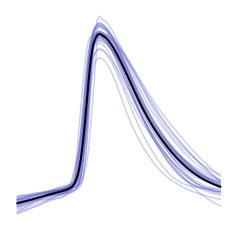

1 30


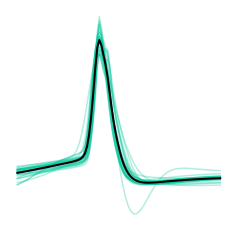

2 20


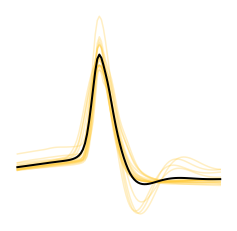

3 20


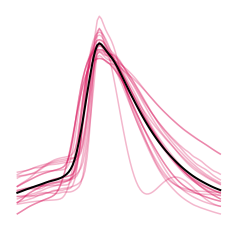

4 26


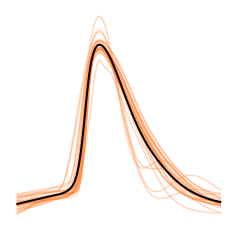

5 34


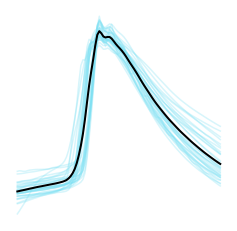

6 28


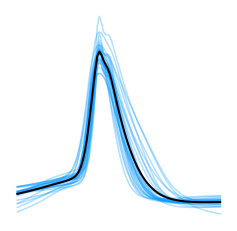

In [33]:
# FN_combined['waveform_labels_FN'] = labels_wave_FN
mean_waveform_FN = []
for i in list(set(FN_combined['labels_ensemble'])):
    fig,ax = plt.subplots(figsize=[4,4])
    fig.patch.set_visible(False)
    ax.axis('off')
    wave_i = normalize( np.vstack(FN_combined[FN_combined['labels_ensemble']==i]['waveform']) )
    print(i,len(wave_i))
    # wave_i += np.random.randn(wave_i.shape[0],wave_i.shape[1])*5e-3
    ax.plot(wave_i.T,c=CUSTOM_PAL_SORT_3[i],alpha=0.3)
    ax.plot(np.mean(wave_i.T,axis=1),c='black',alpha=1,linewidth=2)
    ax.set_xticks([])
    ax.set_yticks([])
    mean_waveform_FN.append(np.mean(wave_i.T,axis=1))
    if os.path.exists(savepath+'/FN_waves_app/'):
        plt.savefig(savepath+'/FN_waves_app/wave_id'+str(i)+'.pdf')
    else:
        os.mkdir(savepath+'/FN_waves_app/')
        plt.savefig(savepath+'/FN_waves_app/wave_id'+str(i)+'.pdf',dpi=200)

    plt.show()

0 37


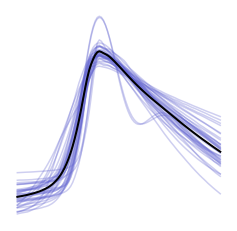

1 30


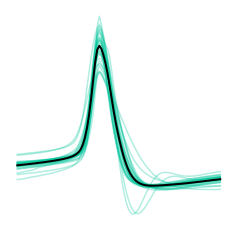

2 20


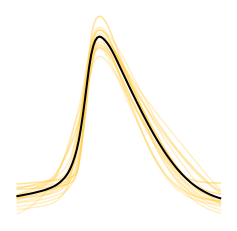

3 23


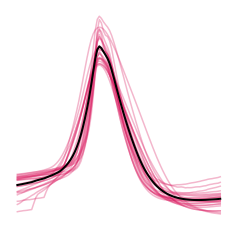

4 36


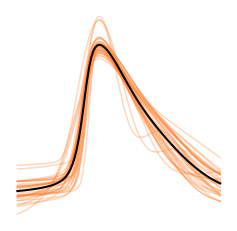

5 22


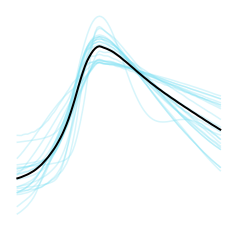

6 18


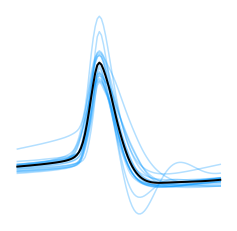

In [38]:
# FN_combined['waveform_labels_FN'] = labels_wave_FN
mean_waveform_SH = []
for i in list(set(SH_combined['labels_ensemble'])):
    fig,ax = plt.subplots(figsize=[4,4])
    fig.patch.set_visible(False)
    ax.axis('off')
    wave_i = normalize( np.vstack(SH_combined[SH_combined['labels_ensemble']==i]['waveforms']) )
    print(i,len(wave_i))
    # wave_i += np.random.randn(wave_i.shape[0],wave_i.shape[1])*5e-3
    ax.plot(wave_i.T,c=CUSTOM_PAL_SORT_3[i],alpha=0.3)
    ax.plot(np.mean(wave_i.T,axis=1),c='black',alpha=1,linewidth=2)
    ax.set_xticks([])
    ax.set_yticks([])
    mean_waveform_FN.append(np.mean(wave_i.T,axis=1))
    if os.path.exists(savepath+'/SH_waves_app/'):
        plt.savefig(savepath+'/SH_waves_app/wave_id'+str(i)+'.pdf')
    else:
        os.mkdir(savepath+'/SH_waves_app/')
        plt.savefig(savepath+'/SH_waves_app/wave_id'+str(i)+'.pdf',dpi=200)

    plt.show()

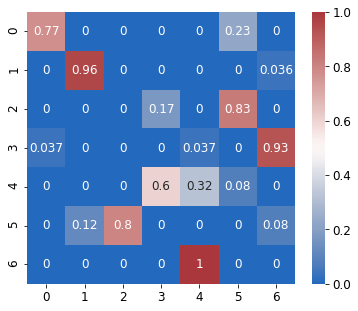

In [51]:
return_confusion_matrix_(FN_combined,FN_combined,'waveform_labels_FN','labels_ensemble',vmin=0,vmax=1,figsize=[6,5],shuffle=True, save=True,cmap='vlag',
                          savepath = savepath+'Confusion_matrix_FN_ensemble.pdf')

In [24]:
FN_combined.columns

Index(['waveform', 'current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'median_isi', 'max_isi', 'min_isi',
       'first_thr', 'mean_thr', 'median_thr', 'min_thr', 'max_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude', 'min_amplitude', 'max_amplitude',
       'tau', 'exp_name', 'cond', 'trialnr', 'waveform_labels_FN',
       'labels_ephys', 'labels_ensemble'],
      dtype='object')

In [25]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

print((adjusted_rand_score(FN_combined.labels_ensemble,FN_combined.waveform_labels_FN) ,
adjusted_mutual_info_score(FN_combined.labels_ensemble,FN_combined.waveform_labels_FN)))



(0.6983124176448776, 0.7654202456364232)


In [27]:
print((adjusted_rand_score(SH_combined.labels_ensemble,SH_combined.waveform_labels_SH) ,
adjusted_mutual_info_score(SH_combined.labels_ensemble,SH_combined.waveform_labels_SH)))



(0.5916291280690403, 0.7368564184681752)


In [28]:
return_confusion_matrix_(SH_combined,SH_combined,'waveform_labels_SH','labels_ensemble',vmin=0,vmax=1,figsize=[6,5],shuffle=False, save=True,cmap='vlag',
                          savepath = savepath+'Confusion_matrix_SH_ensemble.pdf')

NameError: name 'return_confusion_matrix_' is not defined